<a href="https://colab.research.google.com/github/Bhavana123448/NLP1/blob/main/lab04NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
def preprocess_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    # Join the remaining words back into a string
    return ' '.join(cleaned_tokens)

df['cleaned_tweet'] = df['tweet'].apply(preprocess_tweet)
df.head()

,tweet,sentiment,cleaned_tweet
0,@VirginAmerica What @dhepburn said.,neutral,said
1,@VirginAmerica plus you've added commercials t...,positive,plus youve added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing


In [10]:
negative_tweets = df[df['sentiment'] == 'negative']
negative_tweets.head()

,tweet,sentiment,cleaned_tweet
3,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing
5,@VirginAmerica seriously would pay $30 a fligh...,negative,seriously would pay flight seats didnt playing...
15,@VirginAmerica SFO-PDX schedule is still MIA.,negative,sfopdx schedule still mia
17,@VirginAmerica I flew from NYC to SFO last we...,negative,flew nyc sfo last week couldnt fully sit seat ...


In [11]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_negative = tfidf_vectorizer.fit_transform(negative_tweets['cleaned_tweet'])
feature_names_negative = tfidf_vectorizer.get_feature_names_out()

print("Shape of TF-IDF matrix for negative tweets:", tfidf_matrix_negative.shape)
print("Number of feature names (vocabulary) for negative tweets:", len(feature_names_negative))

Shape of TF-IDF matrix for negative tweets: (9178, 8550)
Number of feature names (vocabulary) for negative tweets: 8550


In [12]:
sums = tfidf_matrix_negative.sum(axis=0).A1
tfidf_scores = pd.DataFrame({'term': feature_names_negative, 'score': sums})
tfidf_scores = tfidf_scores.sort_values(by='score', ascending=False)

top_n_terms = 20
top_tfidf_terms = tfidf_scores.head(top_n_terms)
print("Top 20 TF-IDF terms for negative tweets:")
print(top_tfidf_terms)

Top 20 TF-IDF terms for negative tweets:
           term       score
2871     flight  368.336982
3161        get  177.515967
1073  cancelled  168.896615
6668    service  148.073127
3509       hold  139.884072
3590      hours  139.474335
1798   customer  126.836335
3444       help  126.694762
7556       time  117.799541
3692         im  111.415003
1942    delayed  110.506648
7134      still  110.494176
5539      plane  108.571298
3584       hour  106.746956
1080       cant  105.111626
2894  flightled  102.489910
8020         us  102.474834
1045       call  102.023231
5153        one   95.625717
2914    flights   92.313795


/tmp/ipython-input-1062517079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='term', data=top_tfidf_terms, palette='viridis')


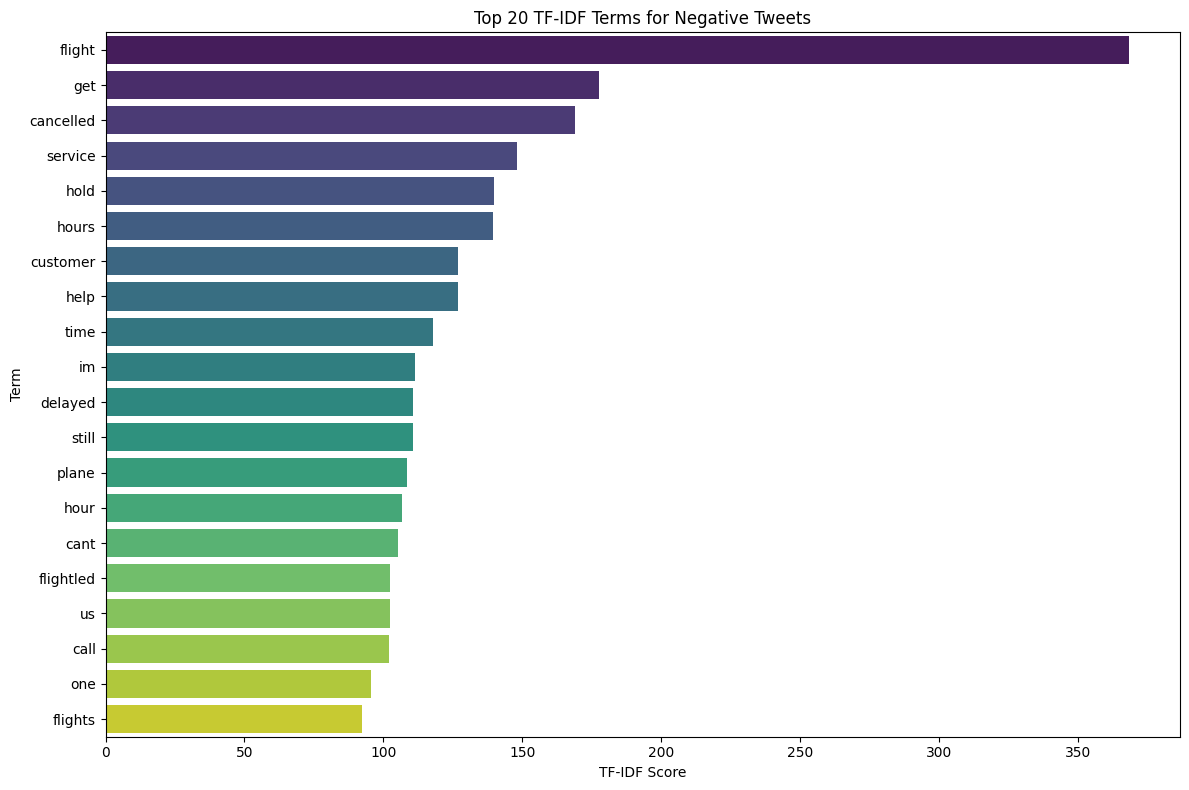

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='term', data=top_tfidf_terms, palette='viridis')
plt.title('Top 20 TF-IDF Terms for Negative Tweets')
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')
plt.tight_layout()
plt.show()

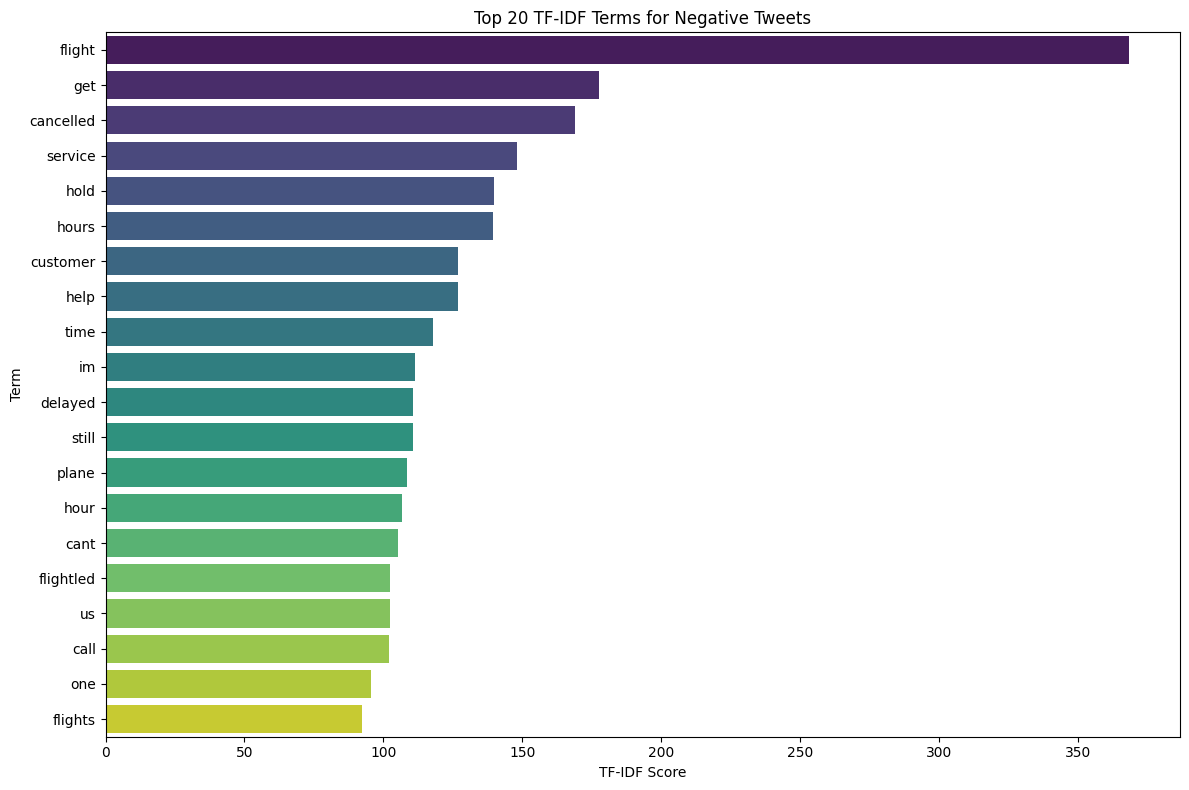

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='term', data=top_tfidf_terms, hue='term', palette='viridis', legend=False)
plt.title('Top 20 TF-IDF Terms for Negative Tweets')
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')
plt.tight_layout()
plt.show()

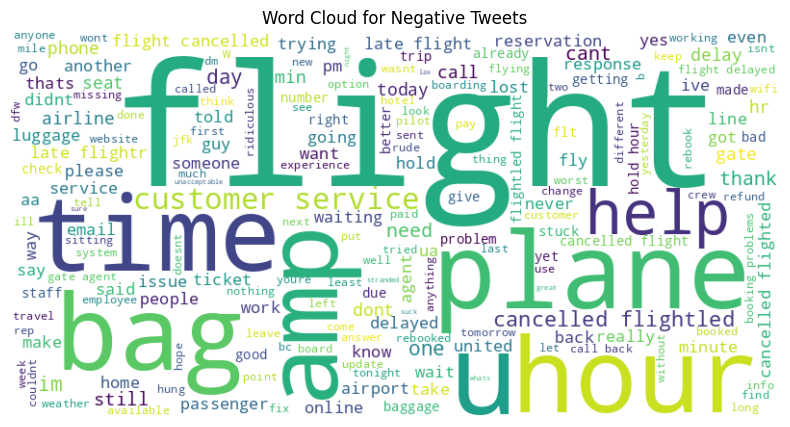

In [15]:
all_negative_words = ' '.join([tweet for tweet in negative_tweets['cleaned_tweet']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()